# Recorte 1985 - 2002 -> Ação

In [1]:
# Importando bibliotecas necessárias para a construção de grafos
import netpixi
from netpixi.integration.gt import *
from regression.integration.gt import *
import pandas as pd
import numpy as np
import csv
import ast
import cpnet
from graph_tool import spectral
import seaborn as sns
import regression as reg
import cpnet

from scipy import stats
from matplotlib import pyplot as plt
from graph_tool import centrality
from graph_tool import spectral

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/usr/local/lib/python3.10/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1582: PendingDeprecationWarning: The register_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps.register(name)`` instead.
  mpl_cm.register_cmap(_name, _cmap)
/usr/local/lib/python3.10/site-packages/seaborn/cm.py:1583: PendingDeprecationWarning: The register_cmap function will b

In [2]:
df = pd.read_csv('./Video_Games_Sales_as_at_22_Dec_2016.csv')
df.dropna(subset=['Publisher'], inplace=True)
df = df.loc[~df['Critic_Score'].isna() & ~df['User_Score'].isna() & ~df['Rating'].isna()]

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [4]:
df_recortado = df.loc[(df['Year_of_Release'] >= 1985) & (df['Year_of_Release'] <= 2002) & (df['Genre'] == 'Action')] 

In [5]:
df_recortado.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
24,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15,95.0,62.0,8.7,730.0,Rockstar North,M
38,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10,97.0,56.0,8.5,664.0,DMA Design,M
139,Driver,PS,1999.0,Action,GT Interactive,3.11,2.80,0.02,0.33,6.27,87.0,22.0,8.1,78.0,Reflections Interactive,T
144,Metal Gear Solid 2: Sons of Liberty,PS2,2001.0,Action,Konami Digital Entertainment,2.45,2.01,0.87,0.72,6.05,96.0,42.0,8.7,1026.0,KCEJ,M
146,Metal Gear Solid,PS,1998.0,Action,Konami Digital Entertainment,3.18,1.83,0.78,0.24,6.03,94.0,20.0,9.4,918.0,KCEJ,M


In [6]:
df_recortado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 24 to 16667
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             137 non-null    object 
 1   Platform         137 non-null    object 
 2   Year_of_Release  137 non-null    float64
 3   Genre            137 non-null    object 
 4   Publisher        137 non-null    object 
 5   NA_Sales         137 non-null    float64
 6   EU_Sales         137 non-null    float64
 7   JP_Sales         137 non-null    float64
 8   Other_Sales      137 non-null    float64
 9   Global_Sales     137 non-null    float64
 10  Critic_Score     137 non-null    float64
 11  Critic_Count     137 non-null    float64
 12  User_Score       137 non-null    float64
 13  User_Count       137 non-null    float64
 14  Developer        137 non-null    object 
 15  Rating           137 non-null    object 
dtypes: float64(10), object(6)
memory usage: 18.2+ KB


In [7]:
publishers = df_recortado["Publisher"].unique()

In [8]:
sixth_console_generation_action_graph = Graph(directed=False) # não-dirigido
sixth_console_generation_action_graph.add_vp('Publisher')
sixth_console_generation_action_graph.add_vp('Games_released')
sixth_console_generation_action_graph.add_ep('strength')

for pub in publishers:
    sixth_console_generation_action_graph.add_vertex(pub)
    sixth_console_generation_action_graph.get_vertex(pub)['Publisher'] = pub
    num_games = df_recortado['Name'].loc[df_recortado["Publisher"] == pub].nunique() 
    sixth_console_generation_action_graph.get_vertex(pub)['Games_released'] = num_games

In [9]:
sorted_years = list(range(1985, 2003))
print(sorted_years)

[1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002]


In [10]:
df_list = []

margem = 4
for i in range(0, len(sorted_years), margem):
    df_list.append(df_recortado[df_recortado['Year_of_Release'].isin(sorted_years[i:i+margem])])

In [11]:
publisher_platforms = []
for db in df_list:
    publisher_platforms.append(db.groupby('Platform')['Publisher'].unique().to_dict())

In [12]:
for platform_dict in publisher_platforms:
    for platform, publishers in platform_dict.items():
        for i in range(len(publishers)):
            if i != len(publishers)-1:
                next_vertex = i+1
                while(next_vertex < len(publishers)):
                    if(publishers[i] != publishers[next_vertex] and not sixth_console_generation_action_graph.has_edge(publishers[i], publishers[next_vertex])):
                        sixth_console_generation_action_graph.add_edge(publishers[i], publishers[next_vertex])
                        sixth_console_generation_action_graph.get_edge(publishers[i], publishers[next_vertex])['strength'] = 1
                        next_vertex += 1
                    else:
                        sixth_console_generation_action_graph.get_edge(publishers[i], publishers[next_vertex])['strength'] += 1
                        next_vertex += 1

In [13]:
print('número de vértices de g:', sixth_console_generation_action_graph.num_vertices())

número de vértices de g: 36


In [14]:
print('número de arestaas de g:', sixth_console_generation_action_graph.num_edges())

número de arestaas de g: 373


In [15]:
gt_save(sixth_console_generation_action_graph, 'sixth_console_generation_action_graph.net.gz')

In [16]:
g = gt_load('sixth_console_generation_action_graph.net.gz')
g = gt_clean(g)
cc = centrality.closeness(g)
g.add_vp('closeness', cc)
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'sixth_console_generation_action_sfdp.net.gz')

# Análise

<AxesSubplot: xlabel='Global_Sales', ylabel='Count'>

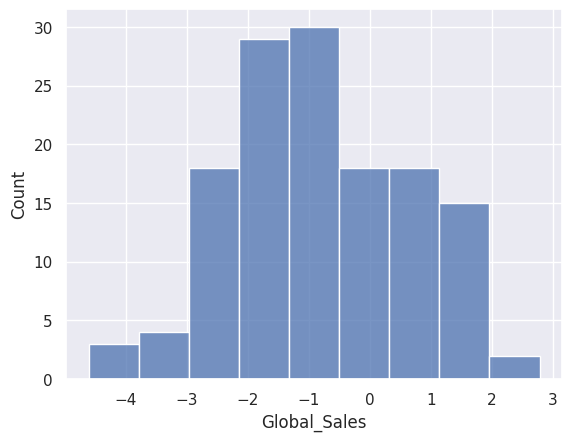

In [17]:
sns.histplot(np.log(df_recortado['Global_Sales']))

# Proximidade X Sucesso

In [18]:
df_pro_suc = df_recortado.copy()

In [19]:
g = gt_load("sixth_console_generation_action_sfdp.net.gz")

In [20]:
data = gt_data(g)
data.drop('Games_released', axis=1, inplace=True)
data.head()

,Publisher,closeness
id,,
Take-Two Interactive,Take-Two Interactive,0.777778
GT Interactive,GT Interactive,0.593220
Konami Digital Entertainment,Konami Digital Entertainment,0.875000
Virgin Interactive,Virgin Interactive,0.777778
Atari,Atari,0.972222


In [21]:
df_pro_suc = pd.merge(df_pro_suc, data, on = "Publisher", how = "inner")
df_pro_suc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             137 non-null    object 
 1   Platform         137 non-null    object 
 2   Year_of_Release  137 non-null    float64
 3   Genre            137 non-null    object 
 4   Publisher        137 non-null    object 
 5   NA_Sales         137 non-null    float64
 6   EU_Sales         137 non-null    float64
 7   JP_Sales         137 non-null    float64
 8   Other_Sales      137 non-null    float64
 9   Global_Sales     137 non-null    float64
 10  Critic_Score     137 non-null    float64
 11  Critic_Count     137 non-null    float64
 12  User_Score       137 non-null    float64
 13  User_Count       137 non-null    float64
 14  Developer        137 non-null    object 
 15  Rating           137 non-null    object 
 16  closeness        137 non-null    float64
dtypes: float64(11), 

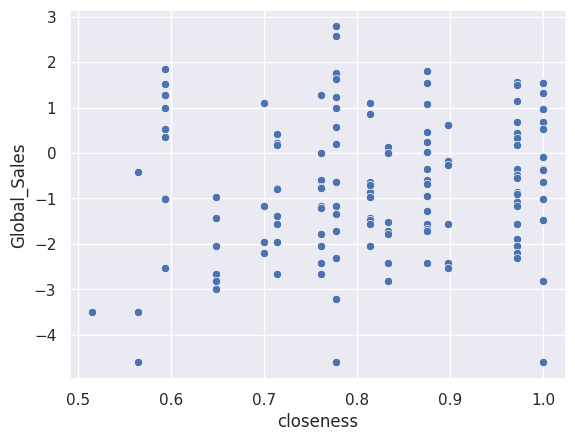

In [22]:
sns.scatterplot(x=df_pro_suc['closeness'], y=np.log(df_pro_suc['Global_Sales']));

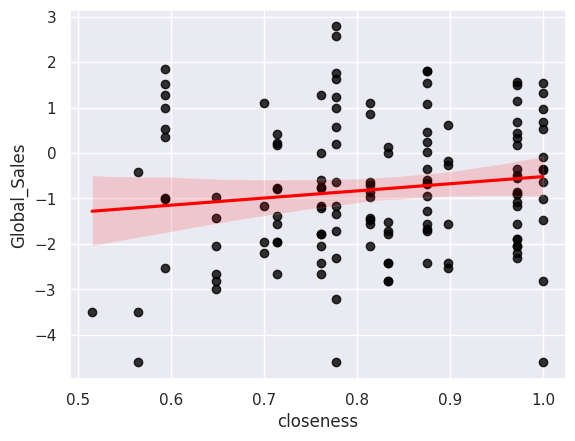

In [23]:
sns.regplot(x=df_pro_suc['closeness'], y=np.log(df_pro_suc['Global_Sales']), scatter_kws={"color": "black"}, line_kws={"color": "red"});

In [24]:
result = reg.linear(data=df_pro_suc, formula='np.log(Global_Sales) ~ closeness')

In [25]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Global_Sales)   R-squared:                       0.018
Model:                              OLS   Adj. R-squared:                  0.010
Method:                   Least Squares   F-statistic:                     2.408
Date:                  Tue, 15 Nov 2022   Prob (F-statistic):              0.123
Time:                          14:57:43   Log-Likelihood:                -248.59
No. Observations:                   137   AIC:                             501.2
Df Residuals:                       135   BIC:                             507.0
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0887      0.840     -2.486      0.014      -3.750      -0.427
closeness      1.5698      1.012      1.552      0.123      -0.431       3.570
==============================================================================
Omnibus:                        0.355   Durbin-Watson:                   0.934
Prob(Omnibus):                  0.838   Jarque-Bera (JB):                0.512
Skew:                           0.081   Prob(JB):                        0.774
Kurtosis:                       2.749   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
result.micro_summary()

variable,coefficient,std error,p-value
closeness,1.569773,1.011630,0.123069


In [27]:
result.nano_summary()

+1.570 (1.012)


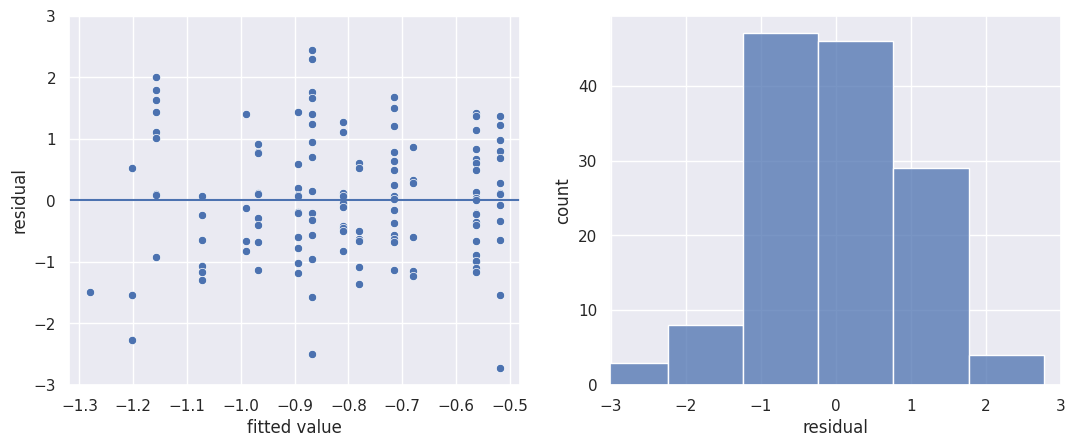

In [28]:
result.plot_residuals()

# Faixa etária X Sucesso

In [30]:
df_rat_suc = df_recortado.copy()
df_rat_suc.loc[df_rat_suc['Rating'] == 'E', 'Rating'] = 1
df_rat_suc.loc[df_rat_suc['Rating'] == 'E10+', 'Rating'] = 1
df_rat_suc.loc[df_rat_suc['Rating'] == 'K-A', 'Rating'] = 1
df_rat_suc.loc[df_rat_suc['Rating'] == 'M', 'Rating'] = 0
df_rat_suc.loc[df_rat_suc['Rating'] == 'T', 'Rating'] = 0
df_rat_suc.loc[df_rat_suc['Rating'] == 'AO', 'Rating'] = 0
df_rat_suc.loc[df_rat_suc['Rating'] == 'RP', 'Rating'] = 0

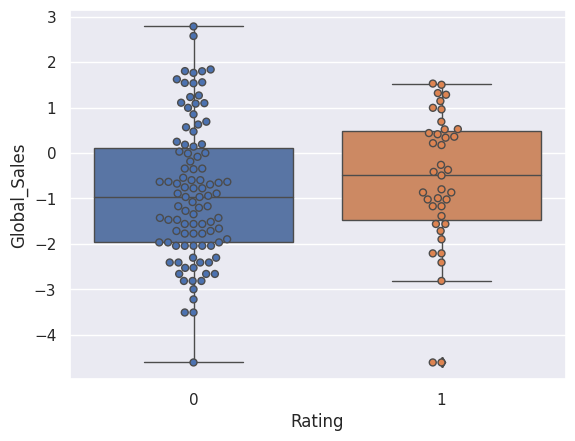

In [31]:
sns.boxplot(x=df_rat_suc['Rating'], y=np.log(df_rat_suc['Global_Sales']), linewidth=1)
sns.swarmplot(x=df_rat_suc['Rating'], y=np.log(df_rat_suc['Global_Sales']), linewidth=1);

In [32]:
result = reg.linear(data=df_rat_suc, formula='np.log(Global_Sales) ~ Rating')

In [33]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Global_Sales)   R-squared:                       0.006
Model:                              OLS   Adj. R-squared:                 -0.001
Method:                   Least Squares   F-statistic:                    0.8124
Date:                  Tue, 15 Nov 2022   Prob (F-statistic):              0.369
Time:                          14:57:52   Log-Likelihood:                -249.39
No. Observations:                   137   AIC:                             502.8
Df Residuals:                       135   BIC:                             508.6
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.8732      0.152     -5.744      0.000      -1.174      -0.573
Rating[T.1]     0.2568      0.285      0.901      0.369      -0.307       0.820
==============================================================================
Omnibus:                        0.026   Durbin-Watson:                   0.017
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.151
Skew:                          -0.001   Prob(JB):                        0.927
Kurtosis:                       2.838   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
result.nano_summary()

+0.257 (0.285)


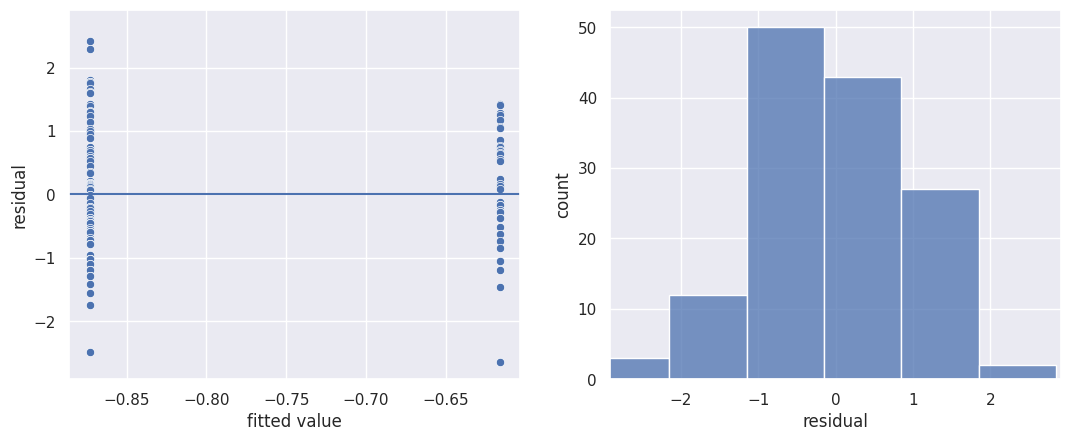

In [35]:
result.plot_residuals()